# Linear Regresssion

Linear model은 단순히 input feature들의 weighted sum과 bias라고 부르는 상수항을 더해서 prediction을 만들어낸다.

**Linear Regression model prediction**

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$
- $\hat{y}$ : predicted value
- $n$ : feature의 수
- $x_i$ : i번째 feature 값
- $\theta_j$ : j번째 model parameter ($\theta_0$ : bias, $\theta_1$ ~ $\theta_j$ : feature weights)

위 식은 다음과 같이 vectorized form으로 더 간결하게 나타낼 수 있다.

**Linear Regression model prediction (vectorized form)**

$\hat{y} = h_{\mathbf{\theta}}(\mathbf{x}) = \mathbf{\theta} \cdot \mathbf{x} = \mathbf{\theta^T} \mathbf{x}$
- $\mathbf{\theta}$ : model의 parameter vector ($\theta_0$ ~ $\theta_j$)
- $\mathbf{x}$ : instance의 feature vector ($x_0$ ~ $x_n$), ($x_0$는 항상 1)
- $\mathbf{\theta} \cdot \mathbf{x}$ : $\mathbf{\theta}$와 $\mathbf{x}$의 dot product ($\theta_0x_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$)
- $h_\mathbf{\theta}$ : hypothesis function
- 머신러닝에서, vector들은 column vector로 보기 때문에, $\mathbf{\theta}$와 $\mathbf{x}$의 dot product는 $\mathbf{\theta^T}$와 $\mathbf{x}$의 matrix muliplication과 같다.

머신러닝에서, vector들은 column vector로 보기 때문에, $\mathbf{\theta}$와 $\mathbf{x}$의 dot product는 $\mathbf{\theta^T}$와 $\mathbf{x}$의 matrix muliplication과 같다. 따라서, 이 책에서는 $\mathbf{\theta^T} \mathbf{x}$의 형태로 표기한다.

이제 linear regression model을 정의했으므로, 학습을 위한 performance measure를 정해야 한다.

linear regression model에서는, RMSE가 일반적으로 사용되지만 여기서는 단순한 MSE를 살펴보자. RMSE는 MSE에 root를 취한 것이므로, MSE를 최소화 하는 $\mathbf{\theta}$를 찾는 것도 RMSE와 같은 결과를 가져온다.

Training set $\mathbf{X}$에 대한 linear regression hypothesis $h_\mathbf{\theta}$의 MSE는 다음과 같다.

**MSE cost function for a Linear Regression model**

$MSE(\mathbf{X}, h_\mathbf{\theta}) = \dfrac{1}{m}\sum\limits^m_{i=1}\Big(\mathbf{\theta^T}\mathbf{x}^{(i)} - y^{(i)}\Big)^2$

## The Normal Equation

cost function을 최소화하는 $\mathbf{\theta}$를 바로 찾을 수 있는 수학 공식이 있는데 이를 Normal Equation이라고 한다.

**Normal Equation**

$\hat{\mathbf{\theta}} = \big( \mathbf{X}^T \mathbf{X} \big)^{-1} \mathbf{X}^T \mathbf{y}$
- $\hat{\mathbf{\theta}}$ : cost function을 최소화하는 $\mathbf{\theta}$
- $\mathbf{y}$ : target value ($y^{(1)}$ ~ $y^{(m)}$)

위의 equation을 테스트해보기 위해 linear한 데이터를 만들어보자.

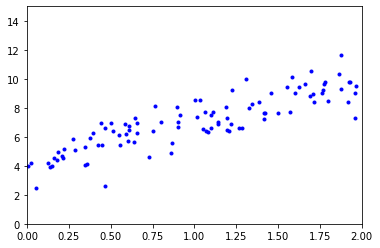

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

이제 Normal Equation으로 $\hat{\mathbf{\theta}}$를 계산해보자.

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # x0=1을 각 instance에 추가(x0 column 추가)
theta_best = np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), np.dot(X_b.T, y))

우리가 생성한 데이터의 실제 함수는 $y = 4 + 3x_1 + $Gaussian noise이다. 어떤 값이 나왔는지 확인해보자.

In [3]:
print(theta_best)

[[4.21764144]
 [2.83277339]]


정답인 $\theta_0 = 4, \theta_1 = 3$이 아니라 $\theta_0 = 4.21764144, \theta_1 = 2.83277339$를 얻었다. 큰 차이가 나지는 않지만 noise로 인해 원래 식의 정확한 parameter는 얻지 못하였다.

이제 $\hat{\mathbf{\theta}}$으로 prediction을 해보자.

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_pred = X_new_b.dot(theta_best)
print(y_pred)

[[4.21764144]
 [9.88318822]]


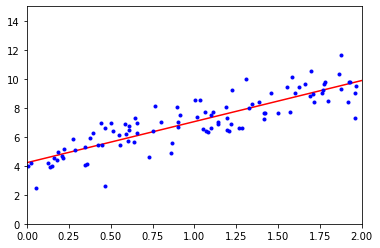

In [5]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

위의 Normal Equation을 사용한 Linear Regression을 사이킷런으로 수행하면 아주 간단하다.

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
# inctercept_ : bias term
# coef_       : weights
print(f"bias: {lin_reg.intercept_}, weights: {lin_reg.coef_}")
print('')
print(f"prediction:\n{lin_reg.predict(X_new)}")

bias: [4.21764144], weights: [[2.83277339]]

prediction:
[[4.21764144]
 [9.88318822]]


사이킷런의 `LinearRegression`class는 `scipy.linalg.lstsq()`에 기반한다.(least squares, 최소제곱법)

이는 다음과 같이 직접 호출할수도 있다.

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

[[4.21764144]
 [2.83277339]]


위 함수는 $\hat{\mathbf{\theta}} = \mathbf{X^+y}$를 계산하며, 여기서 $\mathbf{X^+}$는 $\mathbf{X}$의 pseudoinverse를 의미한다.(Moore-Penrose inverse)

pseudoinverse는 `np.linalg.pinv()`를 통해 계산할 수 있다.

In [8]:
print(np.linalg.pinv(X_b).dot(y))

[[4.21764144]
 [2.83277339]]


pseudoinverse는 Singular Valuse Decompostion(SVD)를 통해 계산되며 이는 Normal Equation보다 효율적이다. 또한, Normal Equation은 not invertable(singular case)한 경우에는 동작하지 않지만, pseudoinverse는 항상 정의될 수 있다.

## Computational Complexity

Normal Equation은 $\mathbf{X}^T \mathbf{X}$의 inverse를 계산하는데, 이는 n개의 feature가 있을 때, (n+1) $\times$ (n+1) 크기의 행렬이며 inverse의 computational complexity는 일반적으로 $O(n^{2.4})$에서 $O(n^{3})$이다. 따라서, feature가 2배가 되면, 시간은 $n^{2.4}=5.3$에서 $n^{3}=8$배가 된다.

사이킷런의 `Linear Regression`에서 사용하는 SVD 방법은 $O(n^2)$이다. 따라서, feature가 2배가 되면, 시간은 $n^2=4$배가 된다.

또한, Normal Equation이나 다른 방법을 사용해 Linear Regression model을 일단 한번 학습시키고 나면, prediction은 매우 빨리 수행된다. computational complexity가 instance의 수에 linear하므로 instance가 2배가 되면, 2배의 시간이 걸리게 된다.